### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import cv2
import tkinter as tk

Lets import the images

In [2]:
images = []
def load_images(path : str):
    for file in os.listdir(path):
        file_path = os.path.join(path, file)
        img = cv2.imread(file_path)
        if img is not None:
            images.append(img)
    return images

In [3]:
images = load_images('dataset/Task 2-ImageDataSet')

### PREPROCESSING

In [4]:
images[0].shape

(256, 256, 3)

256 by 256 pixel image with RGB

In [5]:
#resizing image
def resize_image(image, size=(128, 128)):
    return cv2.resize(image, size)

#grey_scale_image
def grey_scale_image(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

def rgb_channel(image, channel):
    return image[:,:,channel], ['Reds', 'Greens', 'Blues'][channel]

def sharpening(image, value : int = 9):
    kernel = np.array([[0, -1, 0],
                       [-1, value,-1],
                       [0, -1, 0]])
    
    return cv2.filter2D(image, -1, kernel)

def blurring(image,x : int = 5, y : int = 5):
    return cv2.GaussianBlur(image, (x, y), 0)

def edge_detection_canny(image, low_threshold : int = 150, high_threshold : int = 160):
    return cv2.Canny(image, low_threshold, high_threshold)

def edge_detection_scharr(image, x, y):
    return cv2.Scharr(image, cv2.CV_64F, x, y)

def edge_detection_LoG(image):
    return cv2.Laplacian(image, cv2.CV_64F)

def draw_histo_gram(image,ax):
    pd.Series(image.flatten()).plot(kind='hist', bins=256, ax= ax)

def box_blur(image, ksize=(5, 5)):
    return cv2.boxFilter(image, -1, ksize)

def denoise_image_color(image, h, tws,swz):
    return cv2.fastNlMeansDenoisingColored(image, None, h=h,templateWindowSize=tws, searchWindowSize=swz)

def denoise_image_gray(image, h, tws,swz): 
    return cv2.fastNlMeansDenoising(image, None, h=h,templateWindowSize=tws, searchWindowSize=swz)

def invert_colors(image):
    return cv2.bitwise_not(image)

def keep_only_green(image):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    lower_green = np.array([40, 40, 40])
    upper_green = np.array([80, 255, 255])
    mask = cv2.inRange(hsv, lower_green, upper_green)

    solid = np.zeros_like(image)
    solid[mask>0] = (0,255,0)

    image = cv2.bitwise_and(image, image, mask=mask)

    return solid, mask

def morpho(image,x,y, type : str = 'open'):
    kernel = np.ones((x,y),np.uint8)
    match type:
        case 'open':
            return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
        case 'close':
            return cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)


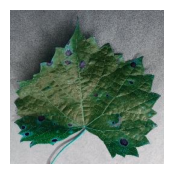

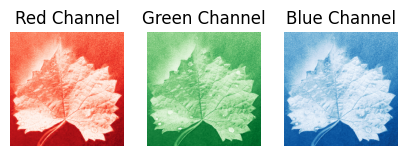

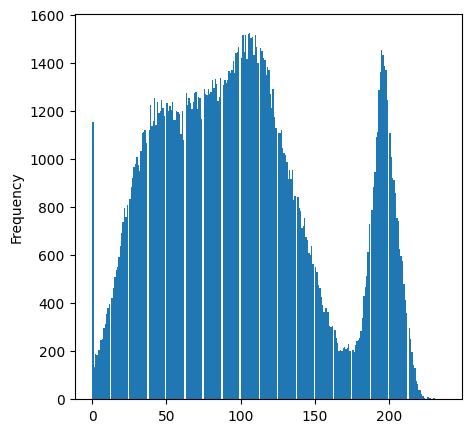

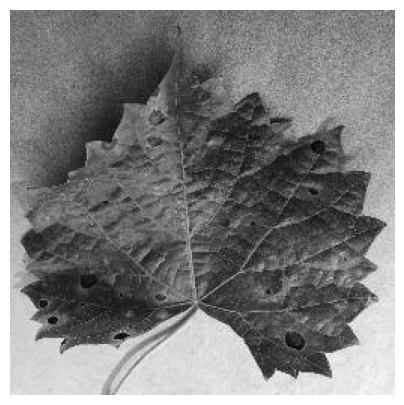

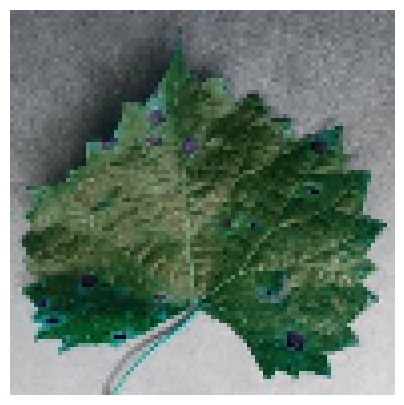

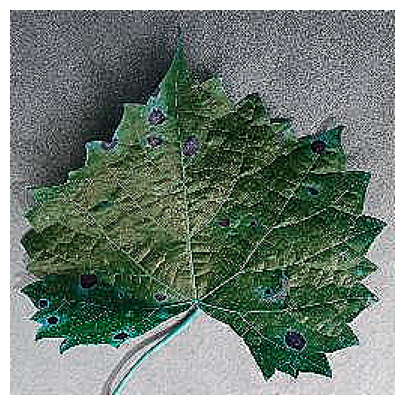

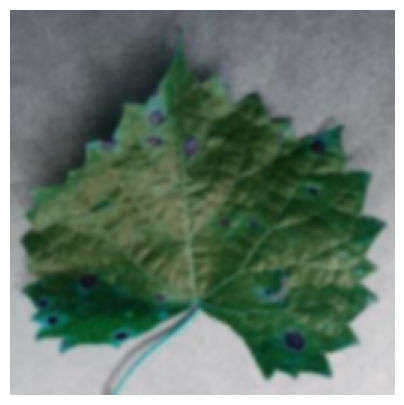

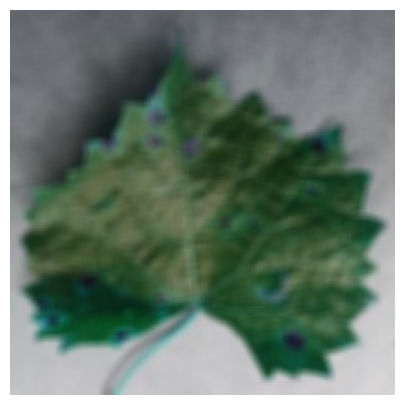

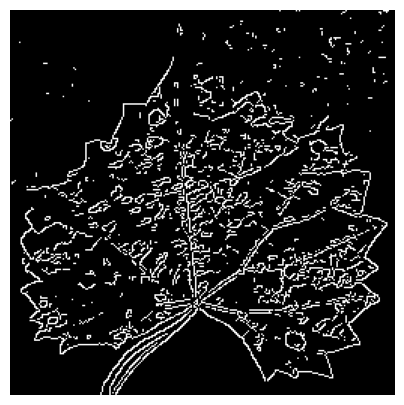

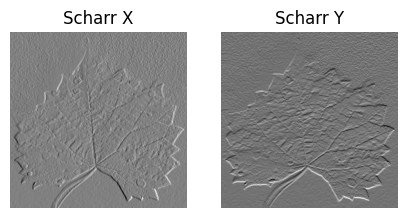

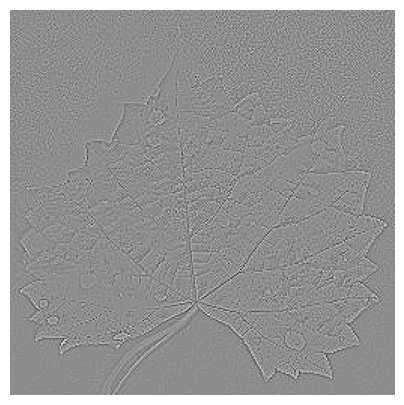

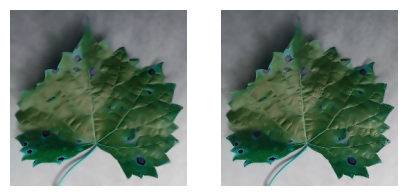

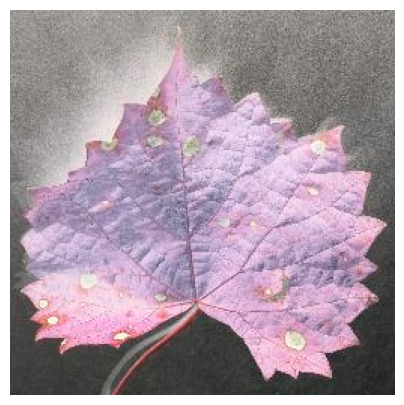

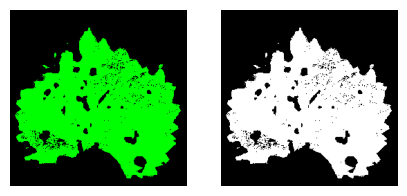

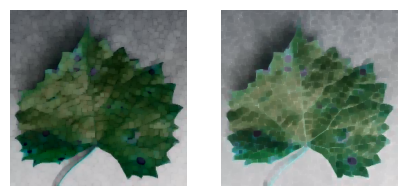

In [6]:
def image_details_show(image):

    fig, ax = plt.subplots(figsize=(2,2))
    ax.imshow(image)
    ax.axis('off')

    fig, ax = plt.subplots(1,3, figsize=(5,10))
    for i in range(3):

        ax[i].set_title(['Red Channel', 'Green Channel', 'Blue Channel'][i])
        ax[i].axis('off')
        ax[i].imshow(rgb_channel(image, i)[0], cmap=rgb_channel(image, i)[1])
        ax[i].axis('off')

    fig, ax = plt.subplots(figsize=(5,5))
    draw_histo_gram(image, ax)

    fig, ax = plt.subplots(figsize=(5,5))
    ax.imshow(grey_scale_image(image), cmap='gray')
    ax.axis('off')

    fig, ax = plt.subplots(figsize=(5,5))
    ax.imshow(resize_image(image,size=(96,96)))
    ax.axis('off')

    fig, ax = plt.subplots(figsize=(5,5))
    ax.imshow(sharpening(image, value = 5))
    ax.axis('off')

    fig, ax = plt.subplots(figsize=(5,5))
    ax.imshow(blurring(image,x=7,y=7))
    ax.axis('off')

    fig, ax = plt.subplots(figsize=(5,5))
    ax.imshow(box_blur(image, ksize=(7, 7)), cmap='gray')
    ax.axis('off')

    fig, ax = plt.subplots(figsize=(5,5))
    ax.imshow(edge_detection_canny(grey_scale_image(image), low_threshold=150, high_threshold=200), cmap='gray')
    ax.axis('off')

    fig, ax = plt.subplots(1,2, figsize=(5,10))
    ax[0].set_title('Scharr X')
    ax[0].imshow(edge_detection_scharr(grey_scale_image(image), 1, 0), cmap='gray')
    ax[0].axis('off')

    ax[1].set_title('Scharr Y')
    ax[1].imshow(edge_detection_scharr(grey_scale_image(image), 0, 1), cmap='gray')
    ax[1].axis('off')

    fig, ax = plt.subplots(figsize=(5,5))
    ax.imshow(edge_detection_LoG(grey_scale_image(image)), cmap='gray')
    ax.axis('off')

    fig, ax = plt.subplots(1,2,figsize=(5,10))
    ax[0].imshow(denoise_image_color(image, 15,7,7), cmap='gray')
    ax[0].axis('off')

    ax[1].imshow(denoise_image_gray(image, 15,7,7), cmap='gray')
    ax[1].axis('off')

    fig, ax = plt.subplots(figsize=(5,5))
    ax.imshow(invert_colors(image), cmap='gray')
    ax.axis('off')

    fig, ax = plt.subplots(1,2,figsize=(5,5))
    ax[0].imshow(keep_only_green(image)[0], cmap='gray')
    ax[0].axis('off')

    ax[1].imshow(keep_only_green(image)[1], cmap='gray')
    ax[1].axis('off')

    fig, ax = plt.subplots(1,2,figsize=(5,5))
    ax[0].imshow(morpho(image, 5, 5, type='open'), cmap='gray')
    ax[0].axis('off')

    ax[1].imshow(morpho(image, 5, 5, type='close'), cmap='gray')
    ax[1].axis('off')

image_details_show(images[1])


Now we have all the tools needed for preprocessing let's make the pipeline below.

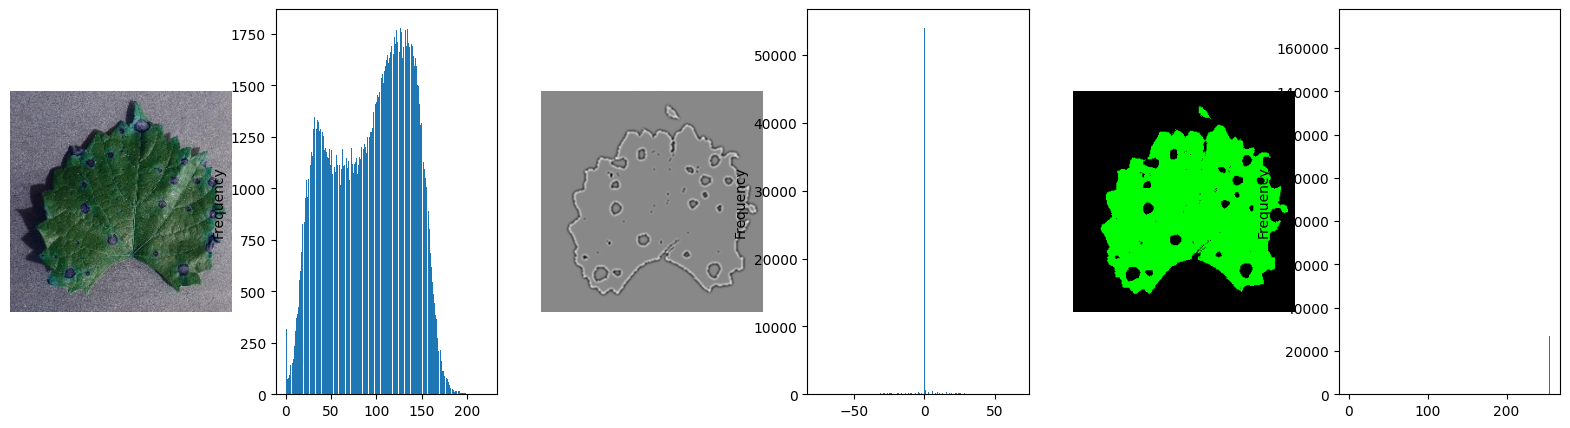

In [7]:
image = images[44]

fig, ax = plt.subplots(1,6, figsize=(20,5))

ax[0].imshow(image)
ax[0].axis('off')
draw_histo_gram(image, ax[1])

#altered_image = sharpening(image, value = 7)
#altered_image = resize_image(image,size=(128,128))
altered_image = denoise_image_color(image, 12, 4, 4)
altered_image = keep_only_green(altered_image)[0]
altered_image = resize_image(altered_image, size=(256,256))
#altered_image = denoise_image_color(altered_image, 12, 4, 4)
rgb_img = altered_image
altered_image = sharpening(altered_image,5)
altered_image = grey_scale_image(altered_image) 
altered_image = invert_colors(altered_image)
altered_image = blurring(altered_image,x=5,y=5)
altered_image = edge_detection_LoG(altered_image)
#altered_image = edge_detection_scharr(altered_image,0,1)

ax[2].imshow(altered_image, cmap='gray')
ax[2].axis('off')

draw_histo_gram(altered_image, ax[3])

ax[4].imshow(rgb_img)
ax[4].axis('off')

draw_histo_gram(rgb_img, ax[5])

def preprocessing_pipeline(image):
    altered_image = denoise_image_color(image, 12, 4, 4)
    altered_image = keep_only_green(image)[0]
    altered_image = resize_image(altered_image, size=(256,256))
    #altered_image = denoise_image_color(altered_image, 12, 4, 4)
    rgb_img = altered_image
    altered_image = sharpening(altered_image,5)
    altered_image = grey_scale_image(altered_image) 
    altered_image = invert_colors(altered_image)
    altered_image = blurring(altered_image,x=5,y=5)
    altered_image = edge_detection_LoG(altered_image)
    return altered_image, rgb_img

test = preprocessing_pipeline(image)

I have found the ideal pipeline which extracts the image into edges indicating unhealthy parts and shadows as smooth area.

### Kmeans

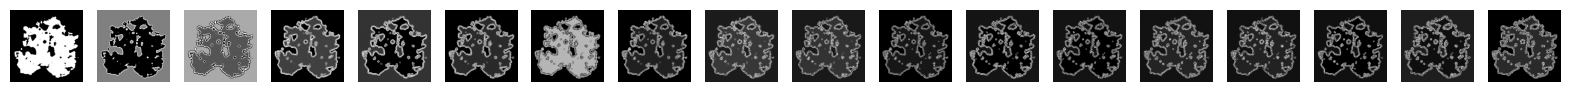

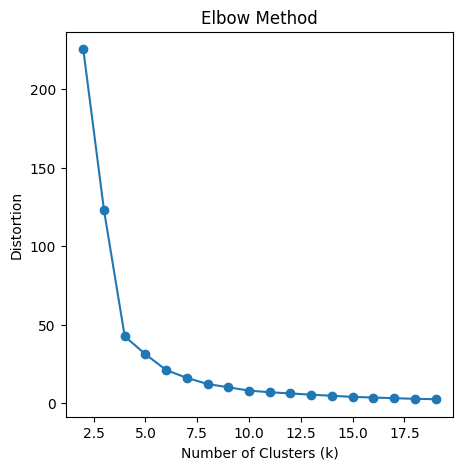

107.30575561523438
black back?
140.9900665283203
WHITE BACKGROUND?
6.0582733154296875
black back?


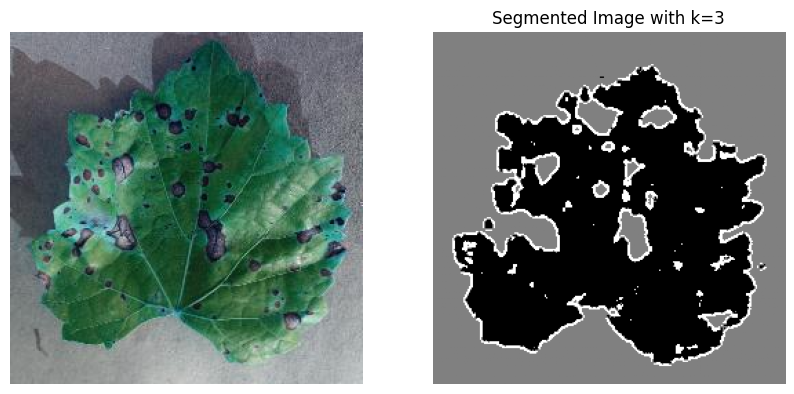

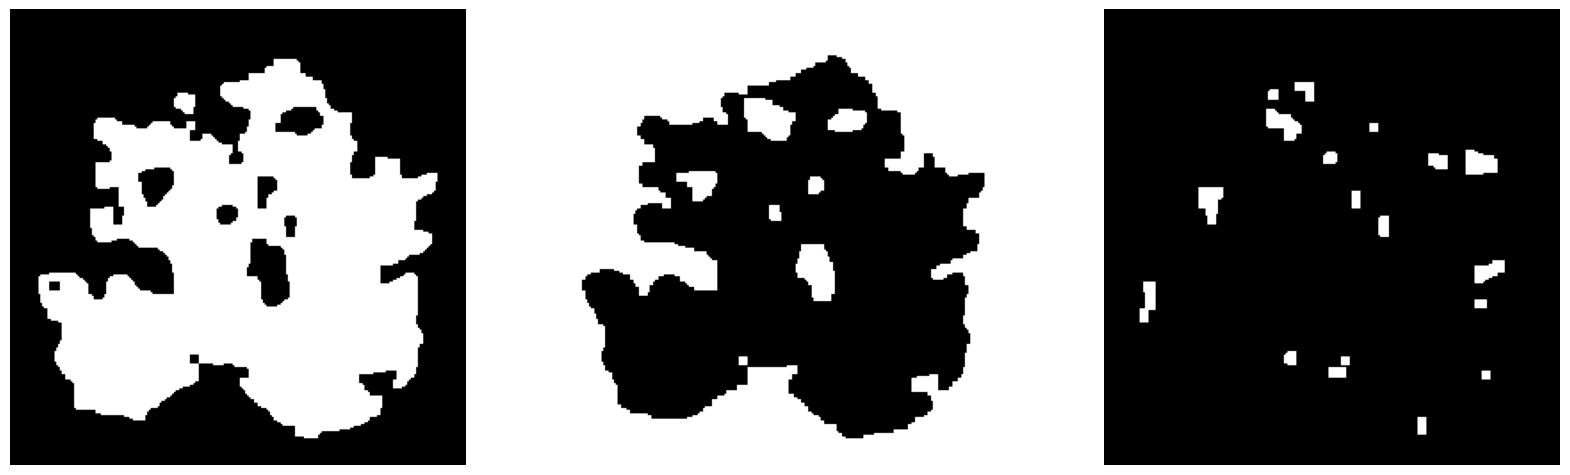

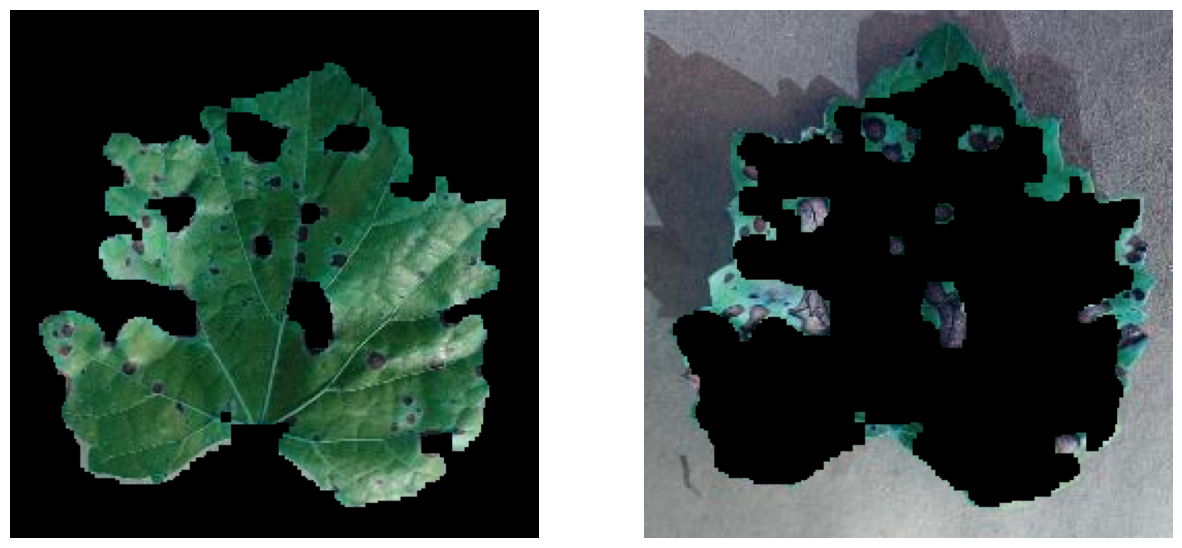

In [8]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 1000, .001)
attempts = 10

def image_segmentation(image, k : int = 8):
    preprocessed_image, rgb_img = preprocessing_pipeline(image)

    H, W, F = rgb_img.shape

    rgb_img = (rgb_img.astype(np.float32) / 255.0).reshape((-1,3)).astype(np.float32)
    x = preprocessed_image.astype(np.float32)
    x = cv2.normalize(x,None, 0.0, 1.0, cv2.NORM_MINMAX)
    x = x.reshape((-1,1)).astype(np.float32)

    X = np.hstack((rgb_img, x)).astype(np.float32)

    ret, labels, centers = cv2.kmeans(X, k, None, criteria, attempts, cv2.KMEANS_PP_CENTERS)

    seg = labels.reshape((H, W))

    return seg, labels, ret

def elbow_method(image, k_range):
    result = []
    for k in k_range:
        seg, labels, ret = image_segmentation(image, k)
        result.append((seg, ret))

    # display part
    fig, ax = plt.subplots(1, len(k_range), figsize=(20, 20))
    for i, (seg, ret) in enumerate(result):
        ax[i].imshow(seg, cmap='gray')
        ax[i].axis('off')
    fig, ax = plt.subplots(figsize=(5,5))
    ax.plot(k_range, [r[1] for r in result], marker='o')
    ax.set_xlabel('Number of Clusters (k)')
    ax.set_ylabel('Distortion')
    ax.set_title('Elbow Method')
    plt.show()

def colorize_labels(seg, seed=0):
    rng = np.random.default_rng(seed)
    k = int(seg.max()) + 1
    palette = rng.integers(0, 255, size=(k, 3), dtype=np.uint8)
    color = palette[seg]
    return color

def post_processing(seg):
    seg = morpho(seg, 5, 5, type='close')
    seg = morpho(seg, 5, 5, type='open')
    seg = morpho(seg, 5, 5, type='open')
    seg = morpho(seg, 5, 5, type='close')
    seg = morpho(seg, 5, 5, type='open')
    
    return seg

def display_results(image, mode = 'debug'):
    k=3
    if mode == 'debug':
        elbow_method(image, range(2, 20))
    seg,labels,ret = image_segmentation(image, k = k)
    if mode == 'debug':
        fig, ax = plt.subplots(1,2,figsize=(10,10))
        ax[0].imshow(image)
        ax[0].axis('off')
        ax[1].set_title(f'Segmented Image with k={k}')
        ax[1].imshow(seg, cmap='gray')
        ax[1].axis('off')
        fig,ax = plt.subplots(1,k,figsize=(20,20))

    disease_mask = None

    for i in range(k):
        mask = (seg == i).astype(np.uint8) * 255
        mask = post_processing(mask)
        if mode == 'debug':
            print(mask.mean())
        if mask.mean() > 127.5:
            if mode == 'debug':
                print("WHITE BACKGROUND?")
            disease_mask = mask
        else:
            if mode == 'debug':
                print("black back?")
        if mode == 'debug':
            ax[i].imshow(mask, cmap='gray')
            ax[i].axis('off')
    if mode == 'debug':
        plt.show()

    if mode == 'debug':
        fig, ax = plt.subplots(1,2,figsize=(15,15))
        ax[0].imshow(cv2.bitwise_and(image, image, mask=cv2.bitwise_not(disease_mask)), cmap='gray')
        ax[0].axis('off')
        ax[1].imshow(cv2.bitwise_and(image, image, mask=disease_mask))
        ax[1].axis('off')
        plt.show()

    grey_scale_img, rgb_img = preprocessing_pipeline(image)

    return grey_scale_img, rgb_img, cv2.bitwise_and(image, image, mask=cv2.bitwise_not(disease_mask)), cv2.bitwise_and(image, image, mask=disease_mask)


#testing
import random

n=random.randint(0,len(images))
grey,rgb,non_disease, disease = display_results(images[n])
# elbow_method(images[n], range(2, 11))

We will be using K = 3 as per elbow method...



### GUI 

In [14]:
from PIL import Image, ImageTk
from tkinter import filedialog

main_img = None
grey_img = None
rgb_img = None
non_disease_img = None
disease_img = None

image = None

def process_image(image):
    grey, rgb, non_disease, disease = display_results(image, mode='silent')

    main_img = ImageTk.PhotoImage((Image.fromarray(image).resize((200,200))))
    main_label.config(image=main_img)
    main_label.image = main_img

    grey_img = ImageTk.PhotoImage((Image.fromarray(grey).resize((200,200))))
    rgb_img = ImageTk.PhotoImage((Image.fromarray(rgb).resize((200,200))))
    non_disease_img = ImageTk.PhotoImage((Image.fromarray(non_disease).resize((200,200))))
    disease_img = ImageTk.PhotoImage((Image.fromarray(disease).resize((200,200))))

    main_label.config(image=main_img,text="Main Specimen")
    main_label.image = main_img
    grey_label.config(image=grey_img,text="Grey Image")
    grey_label.image = grey_img
    rgb_label.config(image=rgb_img,text="RGB Image")
    rgb_label.image = rgb_img
    non_disease_label.config(image=non_disease_img,text="Non-Disease Image")
    non_disease_label.image = non_disease_img
    disease_label.config(image=disease_img,text="Disease Image")
    disease_label.image = disease_img

def open_image():
    global image
    file_path = filedialog.askopenfilename()
    if file_path:
        image = cv2.imread(file_path)
        process_image(image)

root = tk.Tk()
root.title("Main Window")

main_label = tk.Label(root,text="Main Specimen",image=main_img,compound=tk.TOP)
grey_label = tk.Label(root,text="Grey Image",image=grey_img,compound=tk.TOP)
rgb_label = tk.Label(root,text="RGB Image",image=rgb_img,compound=tk.TOP)
non_disease_label = tk.Label(root,text="Non-Disease Image",image=non_disease_img,compound=tk.TOP)
disease_label = tk.Label(root,text="Disease Image",image=disease_img,compound=tk.TOP    )
button = tk.Button(root, text="open image", command=open_image)

main_label.grid(row=0,column=1, padx=10, pady=10)
grey_label.grid(row=1,column=0, padx=10, pady=10)
rgb_label.grid(row=1,column=2, padx=10, pady=10)
non_disease_label.grid(row=2,column=0, padx=10, pady=10)
disease_label.grid(row=2,column=2, padx=10, pady=10)
button.grid(row=2,column=1, padx=10, pady=10)

root.mainloop()